In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
print(os.listdir("C:/Users/Divesh/MalariaPrediction"))

['.ipynb_checkpoints', 'archive', 'demo', 'MDCNNSigmoid.ipynb', 'MDCNNSoftmax.ipynb', 'Untitled.ipynb', 'vgg19 - finetuned  - Copy.ipynb', 'vgg19 - finetuned .ipynb', 'vgg19 - tuned - Copy.ipynb', 'vgg19 - tuned.ipynb']


In [2]:
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils

C:\Users\Divesh\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\Divesh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Divesh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Divesh\Anaconda3\lib\site-packages\tensorflow\python\framew

In [3]:
parasitized_data = os.listdir('C:/Users/Divesh/MalariaPrediction/archive/cell_images/cell_images/Parasitized/')
print(parasitized_data[:10]) #the output we get are the .png files

uninfected_data = os.listdir('C:/Users/Divesh/MalariaPrediction/archive/cell_images/cell_images/Uninfected/')
print('\n')
print(uninfected_data[:10])

['C118P79ThinF_IMG_20151002_110725_cell_152.png', 'C118P79ThinF_IMG_20151002_110834_cell_134.png', 'C118P79ThinF_IMG_20151002_110834_cell_135.png', 'C118P79ThinF_IMG_20151002_110834_cell_136.png', 'C118P79ThinF_IMG_20151002_110834_cell_137.png', 'C118P79ThinF_IMG_20151002_110834_cell_138.png', 'C118P79ThinF_IMG_20151002_110834_cell_139.png', 'C118P79ThinF_IMG_20151002_110834_cell_140.png', 'C118P79ThinF_IMG_20151002_110834_cell_141.png', 'C118P79ThinF_IMG_20151002_110834_cell_142.png']


['C12NThinF_IMG_20150614_124212_cell_111.png', 'C12NThinF_IMG_20150614_124212_cell_120.png', 'C12NThinF_IMG_20150614_124212_cell_125.png', 'C12NThinF_IMG_20150614_124212_cell_138.png', 'C12NThinF_IMG_20150614_124212_cell_161.png', 'C12NThinF_IMG_20150614_124212_cell_165.png', 'C12NThinF_IMG_20150614_124212_cell_187.png', 'C12NThinF_IMG_20150614_124212_cell_200.png', 'C12NThinF_IMG_20150614_124212_cell_213.png', 'C12NThinF_IMG_20150614_124212_cell_224.png']


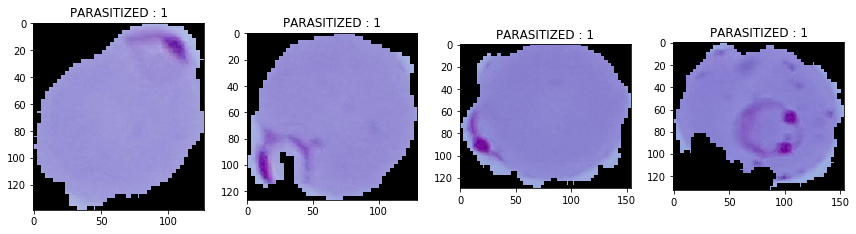

In [4]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('C:/Users/Divesh/MalariaPrediction/archive/cell_images/cell_images/Parasitized' + "/" + parasitized_data[i])
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

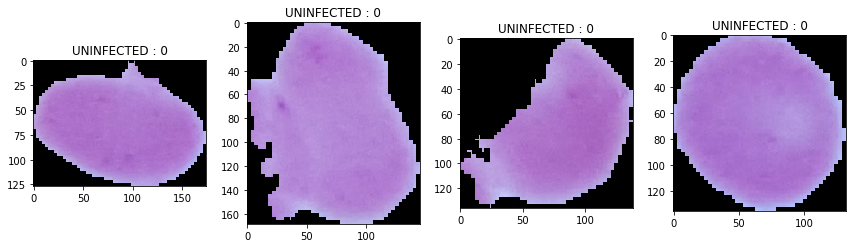

In [5]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('C:/Users/Divesh/MalariaPrediction/archive/cell_images/cell_images/Uninfected' + "/" + uninfected_data[i+1])
    plt.imshow(img)
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

In [6]:
data = []
labels = []
for img in parasitized_data:
    try:
        img_read = plt.imread('C:/Users/Divesh/MalariaPrediction/archive/cell_images/cell_images/Parasitized' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread('C:/Users/Divesh/MalariaPrediction/archive/cell_images/cell_images/Uninfected' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

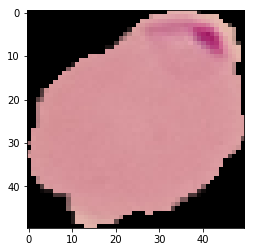

In [7]:
plt.imshow(data[0])
plt.show()

In [8]:
image_data = np.array(data)
labels = np.array(labels)

In [9]:
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 101)

In [11]:
y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

In [12]:
print(f'SHAPE OF TRAINING IMAGE DATA : {x_train.shape}')
print(f'SHAPE OF TESTING IMAGE DATA : {x_test.shape}')
print(f'SHAPE OF TRAINING LABELS : {y_train.shape}')
print(f'SHAPE OF TESTING LABELS : {y_test.shape}')

SHAPE OF TRAINING IMAGE DATA : (4000, 50, 50, 3)
SHAPE OF TESTING IMAGE DATA : (1000, 50, 50, 3)
SHAPE OF TRAINING LABELS : (4000, 2)
SHAPE OF TESTING LABELS : (1000, 2)


In [13]:
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K

from keras import optimizers

In [14]:
import tensorflow as tf

tf.__version__


'1.11.0'

In [15]:
INPUT_SHAPE = (50, 50, 3)
BATCH_SIZE = 64
NUM_CLASSES = 2
EPOCHS = 25

In [16]:
vgg = tf.keras.applications.vgg19.VGG19(include_top=False, weights='imagenet', 
                                        input_shape=INPUT_SHAPE)
# Freeze the layers
vgg.trainable = True
for layer in vgg.layers:
    layer.trainable = False
#set_trainable = False
#for layer in vgg.layers:
 #   if layer.name in ['block5_conv1', 'block4_conv1']:
  #      set_trainable = True
   # if set_trainable:
    #    layer.trainable = True
    #else:
     #   layer.trainable = False
    
base_vgg = vgg
base_out = base_vgg.output
pool_out = tf.keras.layers.Flatten()(base_out)
hidden1 = tf.keras.layers.Dense(512, activation='relu')(pool_out)
drop1 = tf.keras.layers.Dropout(rate=0.3)(hidden1)
hidden2 = tf.keras.layers.Dense(512, activation='relu')(drop1)
drop2 = tf.keras.layers.Dropout(rate=0.3)(hidden2)

out = tf.keras.layers.Dense(2, activation='sigmoid')(drop2)

model = tf.keras.Model(inputs=base_vgg.input, outputs=out)
model.compile(optimizer='Adam',
                loss='mean_squared_error',
                metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50, 50, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 50, 50, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 50, 50, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 25, 25, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 25, 25, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 25, 25, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
__________

In [17]:
print("Total Layers:", len(model.layers))
print("Total trainable layers:", sum([1 for l in model.layers if l.trainable]))


Total Layers: 28
Total trainable layers: 6


In [18]:
import datetime

logdir = os.path.join('/home/dipanzan_sarkar/projects/tensorboard_logs', 
                      datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

In [19]:
history = model.fit(x_train, y_train, 
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS)


Epoch 1/25
4000/4000 [==============================] - 693s 173ms/step - loss: 0.1535 - acc: 0.7775
Epoch 2/25
4000/4000 [==============================] - 617s 154ms/step - loss: 0.0899 - acc: 0.8780
Epoch 3/25
4000/4000 [==============================] - 608s 152ms/step - loss: 0.0795 - acc: 0.8937
Epoch 4/25
4000/4000 [==============================] - 603s 151ms/step - loss: 0.0801 - acc: 0.8935
Epoch 5/25
4000/4000 [==============================] - 5866s 1s/step - loss: 0.0667 - acc: 0.9110
Epoch 6/25
4000/4000 [==============================] - 503s 126ms/step - loss: 0.0612 - acc: 0.9173
Epoch 7/25
4000/4000 [==============================] - 893s 223ms/step - loss: 0.0594 - acc: 0.9230
Epoch 8/25
4000/4000 [==============================] - 498s 125ms/step - loss: 0.0626 - acc: 0.9133
Epoch 9/25
4000/4000 [==============================] - 764s 191ms/step - loss: 0.0584 - acc: 0.9235
Epoch 10/25
4000/4000 [==============================] - 504s 126ms/step - loss: 0.0485 - acc

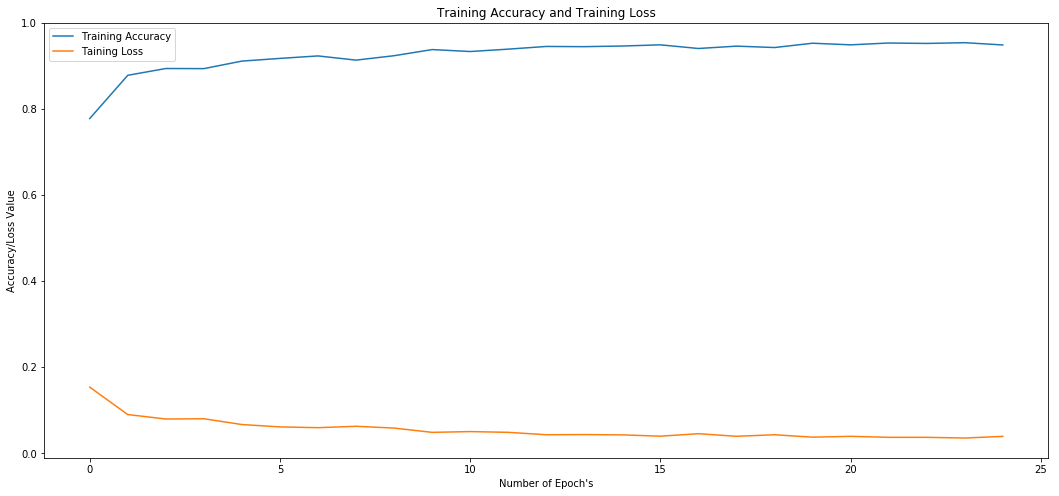

In [20]:
plt.figure(figsize = (18,8))
plt.plot(range(25), history.history['acc'], label = 'Training Accuracy')
plt.plot(range(25), history.history['loss'], label = 'Taining Loss')
#ax1.set_xticks(np.arange(0, 31, 5))
plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss')
plt.legend(loc = "best")

In [21]:
#evaluate the model on test data
predictions = model.evaluate(x_test, y_test)

1000/1000 [==============================] - 136s 136ms/step


In [22]:
print(f'LOSS : {predictions[0]}')
print(f'ACCURACY : {predictions[1]}')

LOSS : 0.06024914935231209
ACCURACY : 0.92
